In [1]:
# importing important Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading the cement strenghth dataset

df = pd.read_csv("https://raw.githubusercontent.com/ektanegi25/Cement-strength-prediction-project/main/cement_data.csv")
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
# Details of the columns in the dataframe

column_name=df.columns
column_name

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [4]:
# cleaning the column names as there are some unnessecasry info.

column_name= [i.split('(')[0] for i in column_name]
column_name

['Cement ',
 'Blast Furnace Slag ',
 'Fly Ash ',
 'Water  ',
 'Superplasticizer ',
 'Coarse Aggregate  ',
 'Fine Aggregate ',
 'Age ',
 'Concrete compressive strength']

In [5]:
# This is how our dataset looks

df.columns = column_name
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
Blast Furnace Slag,1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
Fly Ash,1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
Water,1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
Superplasticizer,1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
Coarse Aggregate,1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
Fine Aggregate,1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
Age,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
Concrete compressive strength,1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


In [8]:
# Checkinh for null values
# Found no null value in dataset

df.isna().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

In [9]:
# checking for duplicate values
# there are 25 duplicat values found in dataset

df.duplicated().sum()

25

In [10]:
df[df.duplicated() == True]

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.398217
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.398217
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.201007
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.201007
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.895819
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.895819
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.294676


In [11]:
# keeping the orignal instance and removing the duplicate values.  

df.drop_duplicates(keep= 'first' , inplace = True)

In [12]:
df.duplicated().sum()

0

In [13]:
# as we had removing the duplicate values from the dataset so there are some indexes which now become void.
# so we need to reset the index

df.reset_index(drop = True, inplace = True)

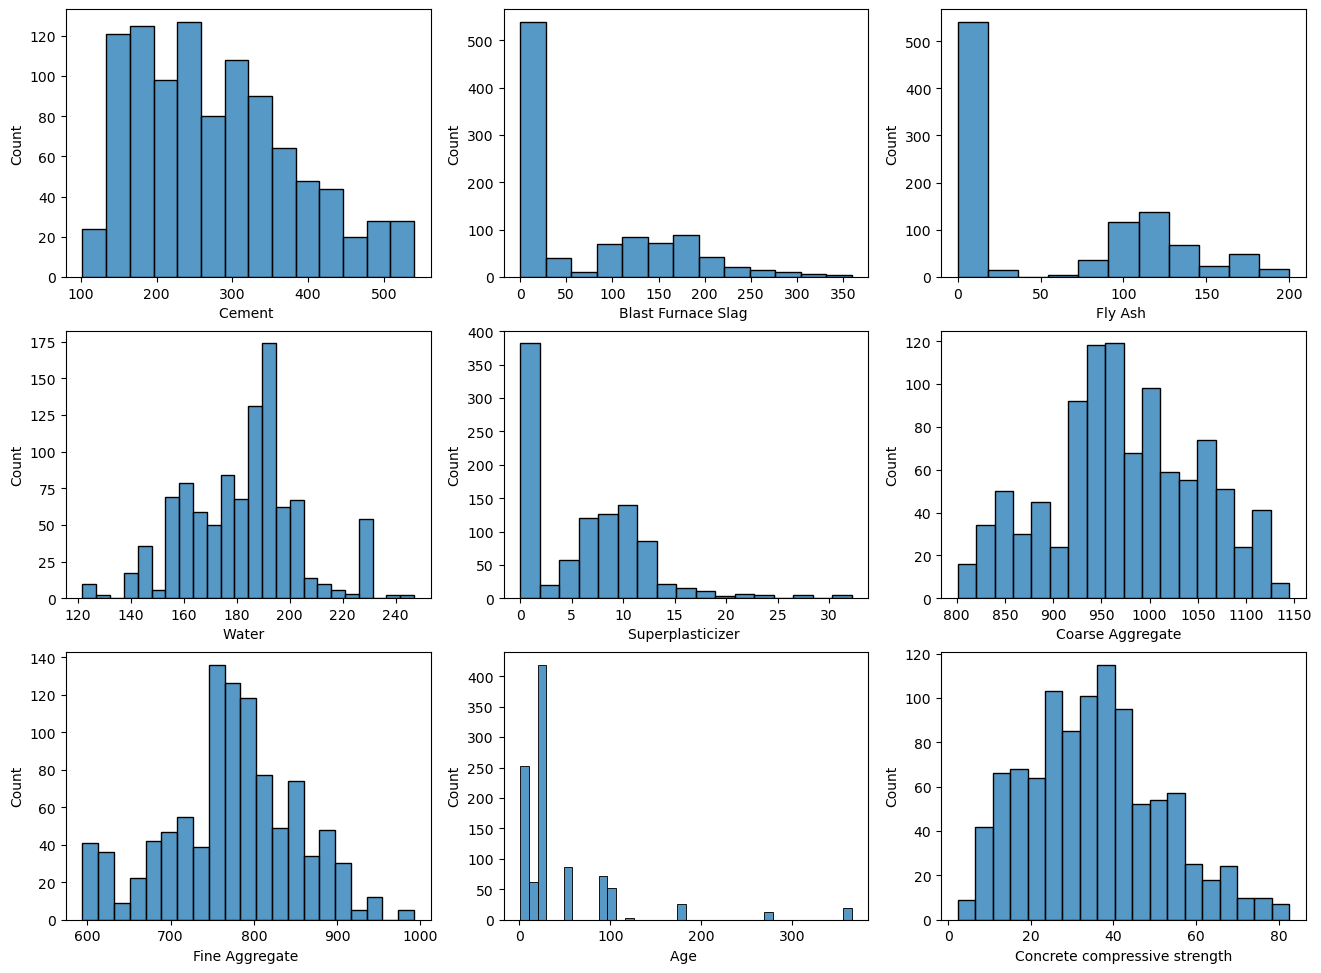

In [14]:
# Visulizing the data by histplot
# we need also check the skewness of the data for further refernces.

plt.figure(figsize= (16,16))
plotnumber =1

for i in df.columns :
    plt.subplot(4,3 , plotnumber)
    sns.histplot(df[i])
    plotnumber+=1
   
plt.show()

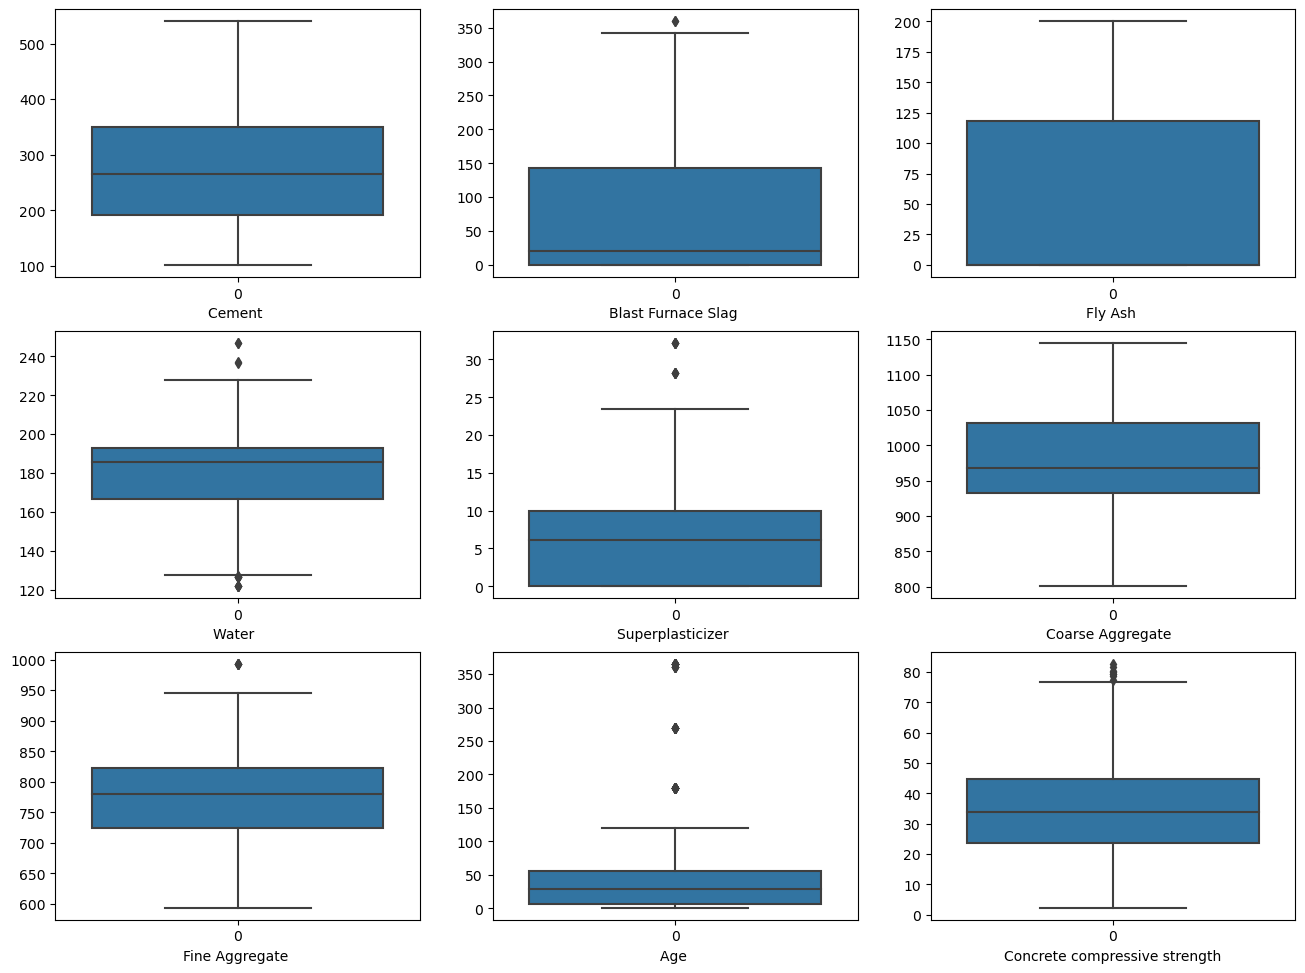

In [15]:
# For checking the outliers we are using the boxplot visulization techniques.

plt.figure(figsize= (16,16))
plotnumber=1
for i in df.columns :
    plt.subplot(4,3 , plotnumber)
    sns.boxplot(df[i])
    plotnumber+=1
    plt.xlabel(i)
    
plt.show()

In [16]:
# Now these are the columns having the outliers.

outliers = ['Blast Furnace Slag ',"Water  ", "Superplasticizer ", 'Fine Aggregate ', 'Age ']

In [17]:
# for treating the outliers we define a function here.

def outlier_capping(dataframe: pd.DataFrame, outliers:list):
    df = dataframe.copy()
    for i in outliers:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3 - q1
        upper_limit = q3 + 1.5 *iqr
        lower_limit = q3 - 1.5 *iqr
        df.loc[df[i] >upper_limit, i] = upper_limit
        df.loc[df[i] <lower_limit, i] = lower_limit
    return df
df = outlier_capping(dataframe = df, outliers = outliers)

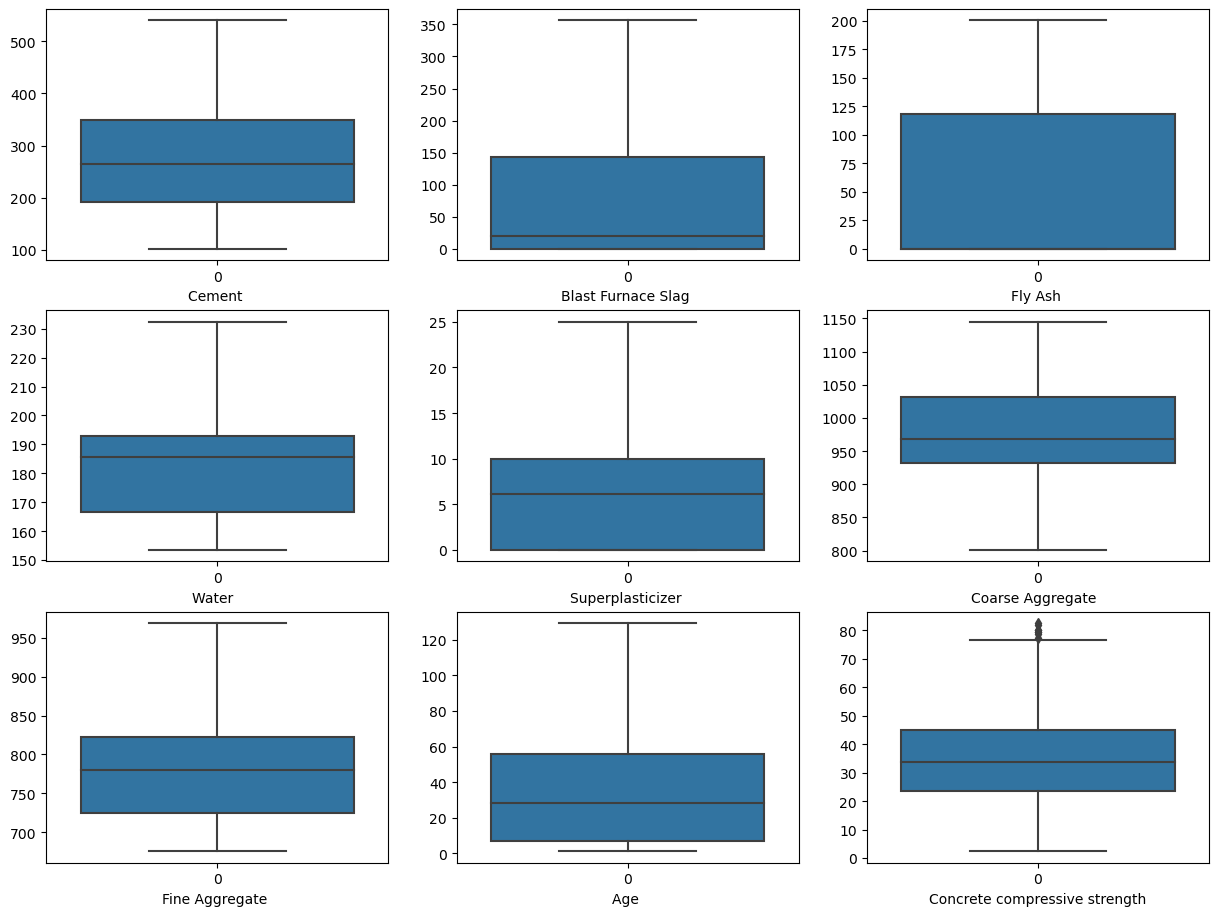

In [18]:
# Now the outliers had been removed , we can see

plt.figure(figsize= (15,15))
plotnumber = 1
for i in df.columns:
    plt.subplot(4,3 , plotnumber)
    sns.boxplot(df[i])
    plotnumber+=1
    plt.xlabel(i)
plt.show()

<Axes: >

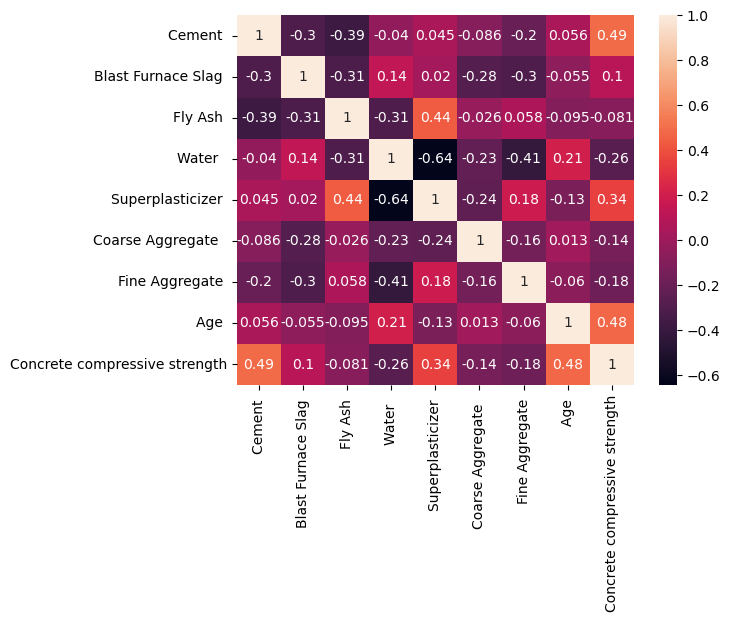

In [19]:
# To visulize the correlation amoung the feature we used the heatmap

sns.heatmap( df.corr() , annot= True)

# cement is highly positively correlated with concrete compressive strength
# Fly ash is highly positively correlated with superplasticizer

In [20]:
# Now we definig the independent and dependent variables

x = df.drop('Concrete compressive strength', axis = 1)
y = df['Concrete compressive strength']

In [21]:
x

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.00,28.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.00,28.0
2,332.5,142.5,0.0,228.0,0.0,932.0,675.35,129.5
3,332.5,142.5,0.0,228.0,0.0,932.0,675.35,129.5
4,198.6,132.4,0.0,192.0,0.0,978.4,825.50,129.5
...,...,...,...,...,...,...,...,...
1000,276.4,116.0,90.3,179.6,8.9,870.1,768.30,28.0
1001,322.2,0.0,115.6,196.0,10.4,817.9,813.40,28.0
1002,148.5,139.4,108.6,192.7,6.1,892.4,780.00,28.0
1003,159.1,186.7,0.0,175.6,11.3,989.6,788.90,28.0


In [22]:
y

0       79.986111
1       61.887366
2       40.269535
3       41.052780
4       44.296075
          ...    
1000    44.284354
1001    31.178794
1002    23.696601
1003    32.768036
1004    32.401235
Name: Concrete compressive strength, Length: 1005, dtype: float64

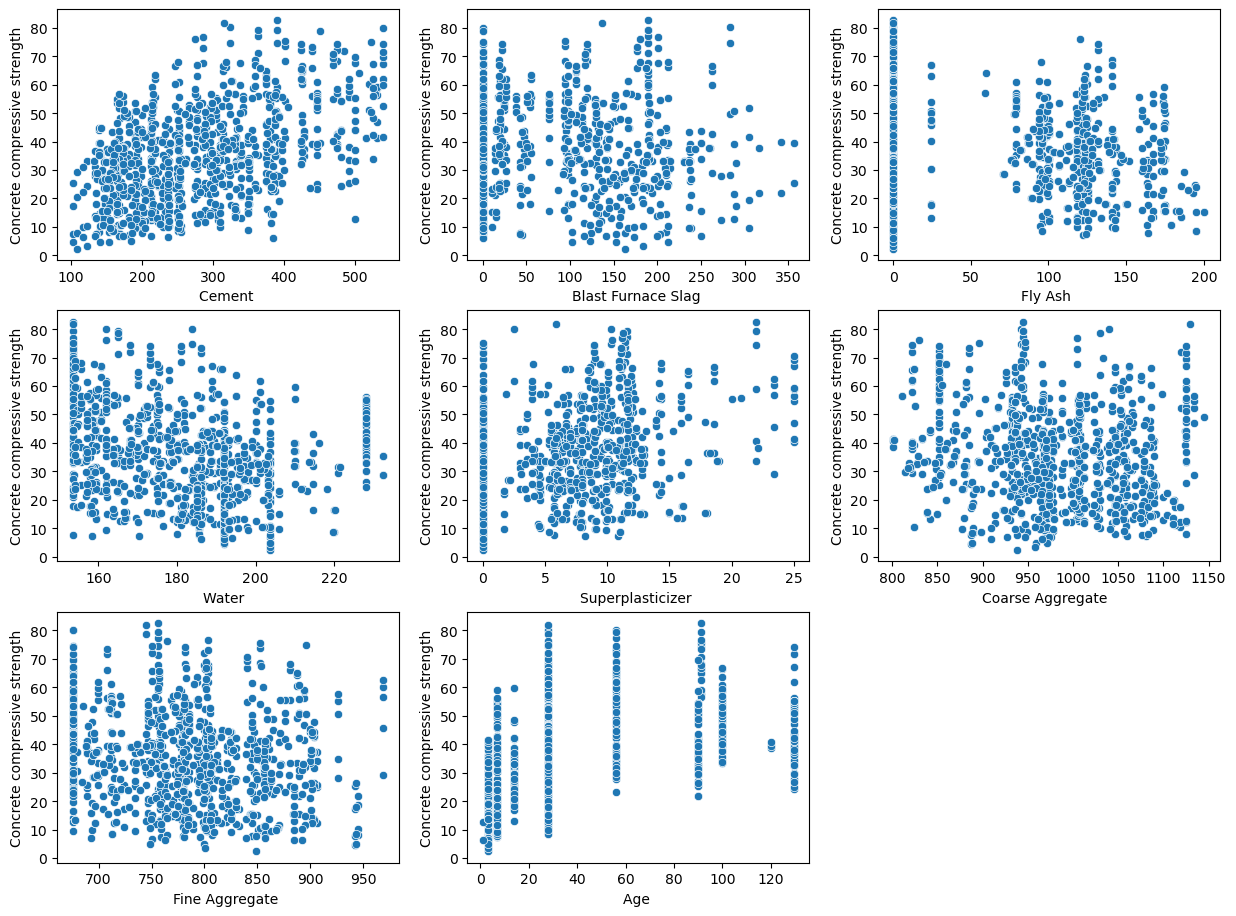

In [23]:
# visulizing the data distribution in the x or independent varibale or features

plt.figure(figsize= (15,15))
plotnumber = 1
for i in x.columns:
    plt.subplot(4,3, plotnumber)
    sns.scatterplot(x = df[i] , y= y)
    plotnumber+=1
plt.show()

In [24]:
# dividing the data into train and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train , y_test= train_test_split(x , y, test_size= 0.30 , random_state = 42)

In [25]:
# importing important libraries for preprocessing and model training

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
# Here we define a function by which we train and process various models and also evalute the formances at a time.

def check_model_performance ( prosessor , x_train , y_train ,x_test,  y_test):

    models = {
    'Liner Regression ' : LinearRegression(),
    'Ridge Regression' : Ridge(),
    'Lasso Regression' : Lasso(),
    'Random Forest Regressor' : RandomForestRegressor(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor()}
    

    for model_names, model in models.items():
        pipeline = make_pipeline(prosessor , model)
        pipeline.fit(x_train, y_train)
        y_pred = pipeline.predict(x_test)
        mse= mean_squared_error(y_test , y_pred)
        r2 = r2_score(y_test , y_pred)
        print(f"{model_names} - Mean Squared Error = {mse:.2f} \n{model_names} - r2_score = {r2:.2f}")

In [27]:
# here we defined the preprocessors with imputers

preprocessor_01 = make_pipeline(KNNImputer(n_neighbors=3), StandardScaler())
preprocessor_02 = make_pipeline(KNNImputer(n_neighbors=3), MinMaxScaler())
preprocessor_03 = make_pipeline(KNNImputer(n_neighbors=3), RobustScaler())

print(f"{'=' * 10} Result for StandardScaler {'=' *10}")
check_model_performance(preprocessor_01, x_train, y_train, x_test, y_test)

print(f"\n{'=' * 10} Result for MinMaxScaler {'=' *10}")
check_model_performance(preprocessor_02, x_train, y_train, x_test, y_test)

print(f"\n{'=' * 10} Result for RobustScaler {'=' *10}")
check_model_performance(preprocessor_03, x_train, y_train, x_test, y_test)

========== Result for StandardScaler ==========
Liner Regression  - Mean Squared Error = 88.36 
Liner Regression  - r2_score = 0.69
Ridge Regression - Mean Squared Error = 88.32 
Ridge Regression - r2_score = 0.69
Lasso Regression - Mean Squared Error = 100.03 
Lasso Regression - r2_score = 0.65
Random Forest Regressor - Mean Squared Error = 29.29 
Random Forest Regressor - r2_score = 0.90
Gradient Boosting Regressor - Mean Squared Error = 34.46 
Gradient Boosting Regressor - r2_score = 0.88

========== Result for MinMaxScaler ==========
Liner Regression  - Mean Squared Error = 88.36 
Liner Regression  - r2_score = 0.69
Ridge Regression - Mean Squared Error = 88.32 
Ridge Regression - r2_score = 0.69
Lasso Regression - Mean Squared Error = 181.19 
Lasso Regression - r2_score = 0.37
Random Forest Regressor - Mean Squared Error = 29.07 
Random Forest Regressor - r2_score = 0.90
Gradient Boosting Regressor - Mean Squared Error = 34.47 
Gradient Boosting Regressor - r2_score = 0.88

======

In [28]:
# by evaluating the all regressors we find that Gradient booster works well in this type of dataset. 

# Now we find the best parameters for the dradient model by gridsearchcv tunning


from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators' : [100,200],
             'learning_rate' : [0.1, 0.01],
             'max_depth' : [5,3,7],
             'min_samples_split': [2,4],
             'min_samples_leaf' : [1,2,3]}

gb = GradientBoostingRegressor()

grid = GridSearchCV(gb, param_grid, scoring = 'neg_mean_squared_error', cv = 5, verbose = 1)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [5, 3, 7],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [29]:
grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [30]:
grid.best_score_

-22.255666393284372

In [31]:
grid.best_estimator_.score(x_test, y_test)

0.9244093841862254